In [13]:
import os
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import copy
import matplotlib as mpl

In [2]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Subject_Block_Session_DwellTimePerformance.xlsx'



df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)




In [3]:
DayNr = [day[0] for day in df.Day]

df['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

Text(0, 0.5, 'Backspace activations')

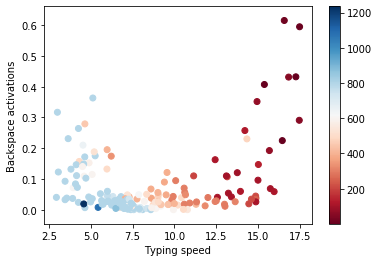

In [4]:
plt.scatter(df.TypingSpeed, df.BackSpaceActivations, c=df.DwellTime, cmap='RdBu')
plt.colorbar()
plt.xlabel('Typing speed')
plt.ylabel('Backspace activations')

In [7]:
print(np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]),\
      np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]),\
     np.mean(df.ErrorRate[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]))

print(np.std(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]),\
      np.std(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]),\
     np.std(df.ErrorRate[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]))

15.89473833737991 0.34280431702768094 0.11471632698434027
1.4150133742193607 0.16543430656386027 0.09022460633503068


In [32]:
print(np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')])\
      ,np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')])\
     ,np.mean(df.ErrorRate[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]))

print(np.std(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]/np.sqrt(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')].count()))\
      ,np.std(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')])/np.sqrt(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')].count())\
     ,np.std(df.ErrorRate[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]/np.sqrt(df.ErrorRate[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')].count())))

14.210269019979846 0.09186236867423664 0.1665587754753931
0.347504692230158 0.02016141613123339 0.035516861493893825


In [170]:
print(np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>400, df.DwellTime<600), df.TypingTechnique=='DT')])\
      , np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>400, df.DwellTime<600), df.TypingTechnique=='DT')]))

9.163800079647295 0.034453932462827054


In [30]:
Red_speed1 = (np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]) - np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]))*100/(np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]))

Red_error1 = (np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')]) - np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]))*100/np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>0, df.DwellTime<100), df.TypingTechnique=='DT')])

print(Red_speed1, Red_error1)

10.597653648935323 73.20268033065089


In [31]:
Red_speed2 = (np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]) - np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>200, df.DwellTime<400), df.TypingTechnique=='DT')]))*100/(np.mean(df.TypingSpeed[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]))

Red_error2 = (np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')]) - np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>200, df.DwellTime<400), df.TypingTechnique=='DT')]))*100/np.mean(df.BackSpaceActivations[np.logical_and(np.logical_and(df.DwellTime>100, df.DwellTime<200), df.TypingTechnique=='DT')])

print(Red_speed2, Red_error2)

18.438569184901777 49.76451488308124


In [10]:
df = df[df.TypingTechnique=='DT']

In [49]:
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(1,1,1)
bins = [0,100,200,300,400,500,600,700,800,900]
df1 = df.groupby(pd.cut(df['DwellTime'], bins=bins)).TypingSpeed.mean().tolist()
#df1.plot(kind='bar', figsize=(15,15), color = 'gray')
df2 = df.groupby(pd.cut(df['DwellTime'], bins=bins)).TypingSpeed.std().tolist()/np.sqrt(df.groupby(pd.cut(df['DwellTime'], bins=bins)).TypingSpeed.count().tolist())
ax.errorbar(bins[0:-1],df1, yerr=df2, color='black', marker='o', linewidth = 5, markersize=15, elinewidth=5, capsize=5)
plt.rcParams.update({'font.size': 52})
ax.set_xlabel('Dwell time [ms]')
ax.set_ylabel('Typing speed [WPM]')
ax.set_xticklabels(['0', '(250-350]', '(450-550]', '(650-750]', '(850-950]', '(1050-1150]'], rotation=90)
mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)


plt.tight_layout()


fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\dwellTime_typingSpeed.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [50]:
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(1,1,1)
bins = [0,100,200,300,400,500,600,700,800,900]
df1 = np.array(df.groupby(pd.cut(df['DwellTime'], bins=bins)).BackSpaceActivations.mean().tolist())*100
#df1.plot(kind='bar', figsize=(15,15), color = 'gray')
df2 = (np.array(df.groupby(pd.cut(df['DwellTime'], bins=bins)).BackSpaceActivations.std().tolist()/np.sqrt(df.groupby(pd.cut(df['DwellTime'], bins=bins)).BackSpaceActivations.count().tolist())))*100
ax.errorbar(bins[0:-1],df1, yerr=df2, color='black', marker='o', linewidth = 5, markersize=15, elinewidth=5, capsize=5)
plt.rcParams.update({'font.size': 52})
ax.set_xlabel('Dwell time [ms]')
ax.set_ylabel('Corrected error rate [%]')
ax.set_xticklabels(['0', '(250-350]', '(450-550]', '(650-750]', '(850-950]', '(1050-1150]'], rotation=90)
mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)

plt.tight_layout()

fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\dwellTime_backspace.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

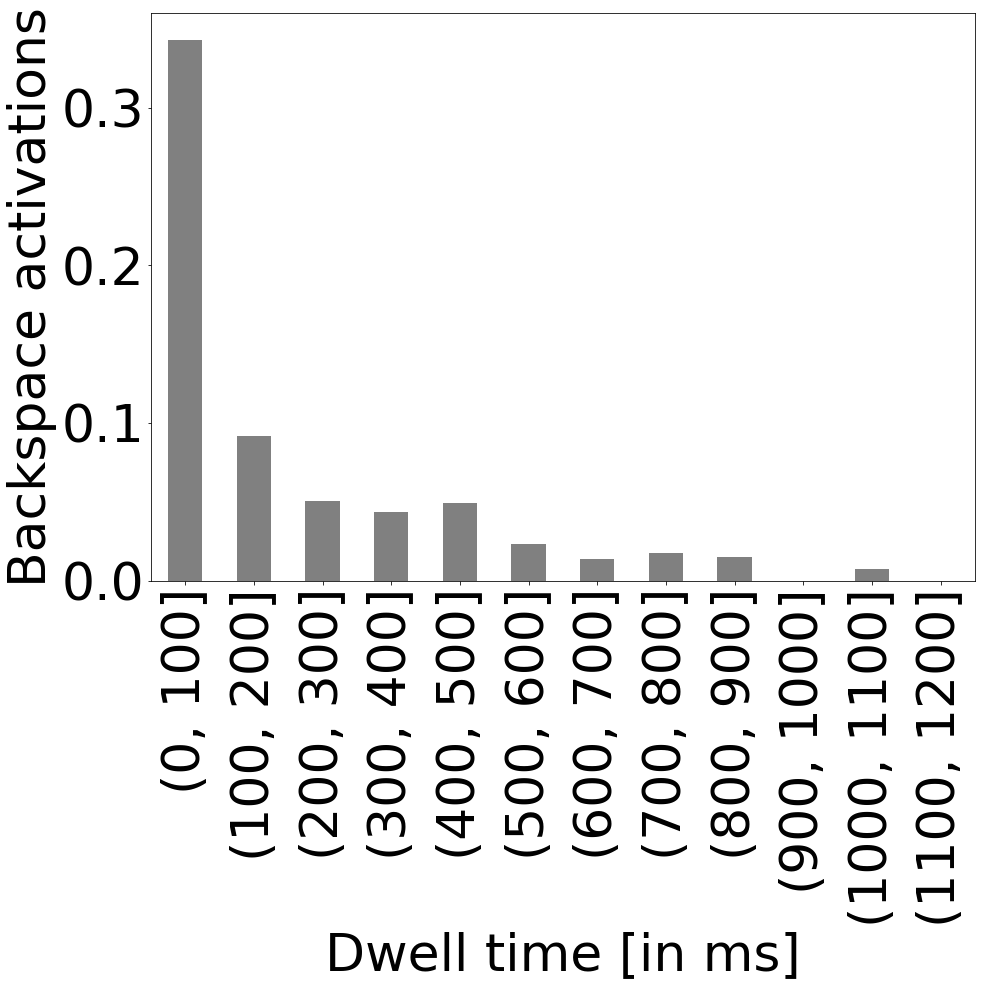

In [18]:
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200]
df1 = df.groupby(pd.cut(df['DwellTime'], bins=bins)).BackSpaceActivations.mean()
df1.plot(kind='bar', figsize=(15,15), color= 'gray')
plt.rcParams.update({'font.size': 52})
plt.xlabel('Dwell time [in ms]')
plt.ylabel('Backspace activations')
plt.tight_layout()

plt.savefig(r'C:\DTU\Results\201901_Expt\ETRA\dwellTime_backspace.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [156]:
for i in [1,2,3,4]:
    print(df.TypingSpeed[df.DayDT==i].max())

17.45719939051163
16.82135191715231
17.25285571481567
17.47623375357756


In [167]:
print(df.TypingSpeed.min())
print(df.BackSpaceActivations.min())
print(df.ErrorRate.max())


4.577184054614547
0.0
0.6848221367141092


In [154]:
for i in [1,2,3,4]:
    print(df.BackSpaceActivations[df.DayDT==i].max())

0.2907765938183053
0.4313032713085234
0.4322027403336701
0.6154323964663784


In [11]:
print(df.DwellTime.mean(), df.DwellTime.std())

518.259558194846 275.13247805868207


In [173]:
for i in np.unique(df.Subject):
    print(i, df.DwellTime[df.Subject==i])

ac 0    607.166677
1    501.544672
2    504.546946
3    419.270956
6    293.796884
7    206.167695
8    213.049020
9    106.513272
Name: DwellTime, dtype: float64
af 10     93.853142
11     57.821011
12      1.484909
13      0.884276
16     76.303988
17      5.419518
18    114.498957
19    119.875052
Name: DwellTime, dtype: float64
aq 20    1081.714282
21     751.663999
22     800.000000
23     800.000000
24     800.000000
25     800.000000
26     800.000000
27     800.000000
Name: DwellTime, dtype: float64
bh1 30    252.627327
31    205.335142
34    118.781636
35    108.551704
36    111.253536
37    108.962567
38    105.751072
39    114.705256
Name: DwellTime, dtype: float64
bh2 40    327.627395
41    301.941694
42    384.565971
43    404.176354
44    303.409272
45    386.567546
46    301.864307
47    206.779616
Name: DwellTime, dtype: float64
cw 50    742.523300
51    600.297816
52    615.943577
53    472.891874
54    358.665836
55    301.942084
56    308.793047
57    302.124330
Name